# 随机森林分类模型代码示例

In [1]:
from sklearn.ensemble import RandomForestClassifier
X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
y = [0, 0, 0, 1, 1]

# n_estimators 基学习器数量
# random_state 使每次结果一致，如果不设置则可能出现每次预测结果不一样的情况，这是因为随机森林遵循“数据随机”和“特征随机”的基本原则）。
model=RandomForestClassifier(n_estimators=10,random_state=123)
model.fit(X,y)

model.predict([[5,5]])

array([0])

# 随机森林回归模型代码示例

In [2]:
from sklearn.ensemble import RandomForestRegressor
X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
y = [1, 2, 3, 4, 5]

# n_estimators 基学习器数量
# random_state 使每次结果一致，如果不设置则可能出现每次预测结果不一样的情况，这是因为随机森林遵循“数据随机”和“特征随机”的基本原则）。
model=RandomForestRegressor(n_estimators=10,random_state=123)
model.fit(X,y)

model.predict([[5,5]])

array([2.8])

# 股票涨跌预测模型

量化金融中基于随机森林模型的股票涨跌预测模型的搭建

量化金融可分为通过大数据分析进行智能择时（选择合适的交易时机）与智能择股（选择合适的交易股票）两个主要方向，

本节只是简单演示量化金融模型的基本思路，商业实战中应用的股票涨跌预测模型则复杂得多

tushare 安装

```PYTHON
pip install tushare -i https://pypi.tuna.tsinghua.edu.cn/simple
```

talib 安装

在 https://www.lfd.uci.edu/~gohlke/pythonlibs/ 中下载 whl 文件，本地安装
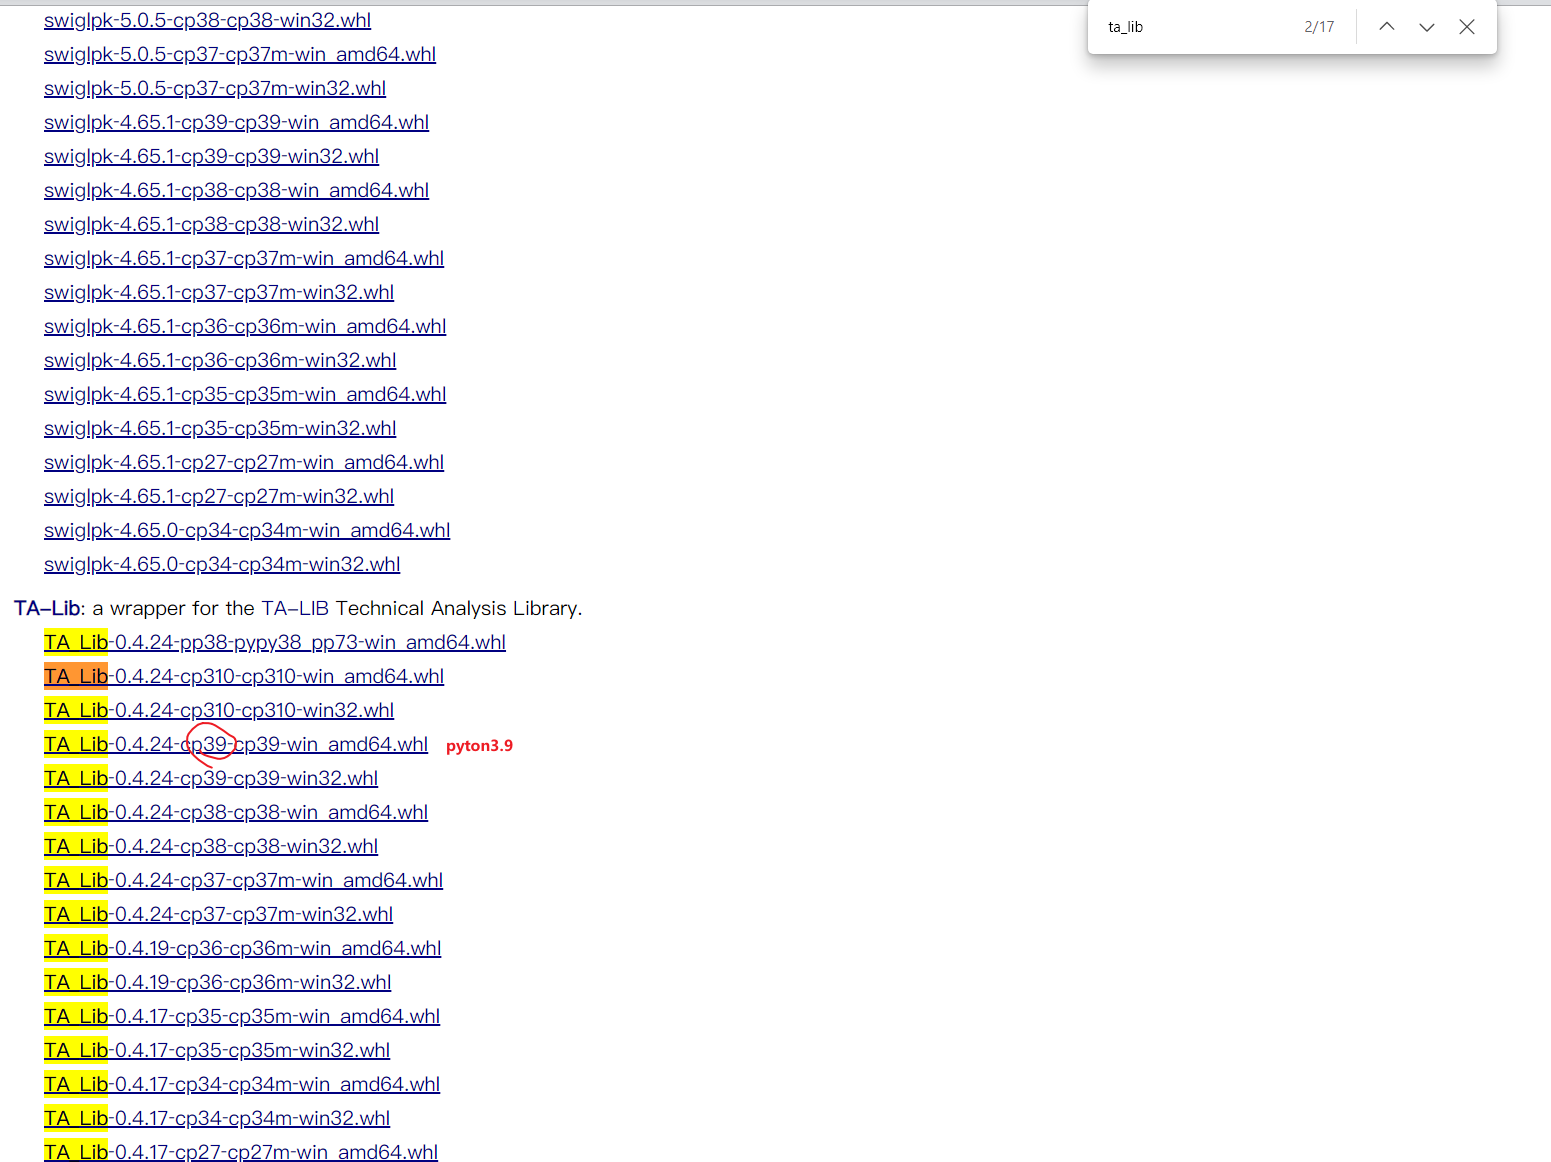

In [14]:
import tushare as ts  # 股票基本数据相关库
import numpy as np  # 科学计算相关库
import pandas as pd  # 科学计算相关库  
import talib  # 股票衍生变量数据相关库
import matplotlib.pyplot as plt  # 引入绘图相关库
from sklearn.ensemble import RandomForestClassifier  # 引入分类决策树模型
from sklearn.metrics import accuracy_score  # 引入准确度评分函数
import warnings
warnings.filterwarnings("ignore") # 忽略警告信息，警告非报错，不影响代码执行

In [15]:
# 1.股票基本数据获取
df = ts.get_k_data('000002',start='2015-01-01',end='2019-12-31')
df = df.set_index('date')  # 设置日期为索引

# 2.简单衍生变量构造
df['close-open'] = (df['close'] - df['open'])/df['open']
df['high-low'] = (df['high'] - df['low'])/df['low']

df['pre_close'] = df['close'].shift(1)  # 该列所有往下移一行形成昨日收盘价
df['price_change'] = df['close']-df['pre_close']
df['p_change'] = (df['close']-df['pre_close'])/df['pre_close']*100

# 3.移动平均线相关数据构造
df['MA5'] = df['close'].rolling(5).mean()
df['MA10'] = df['close'].rolling(10).mean()
df.dropna(inplace=True)  # 删除空值

# 4.通过Ta_lib库构造衍生变量
df['RSI'] = talib.RSI(df['close'], timeperiod=12)  # 相对强弱指标
df['MOM'] = talib.MOM(df['close'], timeperiod=5)  # 动量指标
df['EMA12'] = talib.EMA(df['close'], timeperiod=12)  # 12日指数移动平均线
df['EMA26'] = talib.EMA(df['close'], timeperiod=26)  # 26日指数移动平均线
df['MACD'], df['MACDsignal'], df['MACDhist'] = talib.MACD(df['close'], fastperiod=12, slowperiod=26, signalperiod=9)  # MACD值
df.dropna(inplace=True)  # 删除空值

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


In [17]:
df.head()

,open,close,high,low,volume,code,close-open,high-low,pre_close,price_change,p_change,MA5,MA10,RSI,MOM,EMA12,EMA26,MACD,MACDsignal,MACDhist
date,,,,,,,,,,,,,,,,,,,,
2015-03-11,4.83,4.74,5.01,4.68,1153733.0,000002,-0.018634,0.070513,4.83,-0.09,-1.863354,4.812,5.090,38.525616,-0.29,5.052953,5.316848,-0.298937,-0.286103,-0.012834
2015-03-12,4.87,5.03,5.10,4.77,1818728.0,000002,0.032854,0.069182,4.74,0.29,6.118143,4.876,5.027,45.004001,0.32,5.049422,5.295600,-0.275829,-0.284048,0.008219
2015-03-13,5.08,5.04,5.21,4.97,1334069.0,000002,-0.007874,0.048290,5.03,0.01,0.198807,4.934,4.975,45.221159,0.29,5.047972,5.276667,-0.253784,-0.277995,0.024211
2015-03-16,5.17,5.30,5.34,5.07,1753781.0,000002,0.025145,0.053254,5.04,0.26,5.158730,4.988,4.947,50.738324,0.27,5.086746,5.278395,-0.212879,-0.264972,0.052093
2015-03-17,5.40,5.44,5.55,5.32,2128349.0,000002,0.007407,0.043233,5.30,0.14,2.641509,5.110,4.990,53.489972,0.61,5.141093,5.290366,-0.167237,-0.245425,0.078188


In [18]:
X = df[['close', 'volume', 'close-open', 'MA5', 'MA10', 'high-low', 'RSI', 'MOM', 'EMA12', 'MACD', 'MACDsignal', 'MACDhist']]
y = np.where(df['price_change'].shift(-1)> 0, 1, -1)

其中Numpy库中的where()函数的使用方法如下所示：
np.where(判断条件,满足条件的赋值,不满足条件的赋值)

其中df['price_change'].shift(-1)则是利用shift()函数将price_change（股价变化）这一列往上移动一行，这样就获得了每一行对应的下一天股价涨跌情况。

因此这里的判断条件就是下一天股价是否大于0，如果下一天股价涨了的我们则y赋值为数字1，下一天股价跌了的，则y赋值为数字-1。这个下一天的股价涨跌情况就是我们根据当天股票基本数据以及衍生变量预测的内容。

划分要按照时间序列进行，而不能用train_test_split()函数进行随机划分。这是因为股价的变化趋势具有时间性特征，而随机划分会破坏这种特征，所以需要根据当天的股价数据预测下一天的股价涨跌情况，而不能根据任意一天的股价数据预测下一天的股价涨跌情况。

In [19]:
from posixpath import split


X_length=X.shape[0]
split=int(X_length*0.9)
X_train,X_test=X[:split],X[split:]
y_train,y_test=y[:split],y[split:]

In [22]:
# 网格搜索获取最优参数
from sklearn.model_selection import GridSearchCV
parameters={
    'n_estimators':[5,10,20],
    'max_depth':[2,3,4,5],
    'min_samples_leaf':[5,10,20,30]
}
model=RandomForestClassifier(random_state=1)
grid_search=GridSearchCV(model,parameters,cv=6,scoring='accuracy')
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

RandomForestClassifier(max_depth=2, min_samples_leaf=20, n_estimators=10,
                       random_state=1)

In [23]:
model=RandomForestClassifier(max_depth=2, min_samples_leaf=20, n_estimators=10,
                       random_state=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.5490909090909091